In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('/Users/aryamonani/Desktop/Udemy data sci course/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S38_L265/3.12. Example.csv')

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


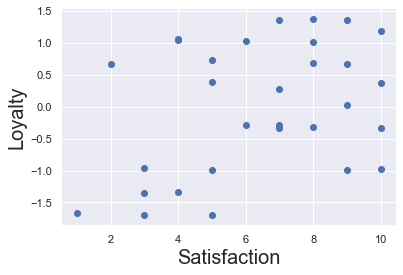

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)
plt.show()

In [6]:
x = data.copy()

In [14]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters['cluster_pred']

0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    0
26    0
27    0
28    1
29    1
Name: cluster_pred, dtype: int32

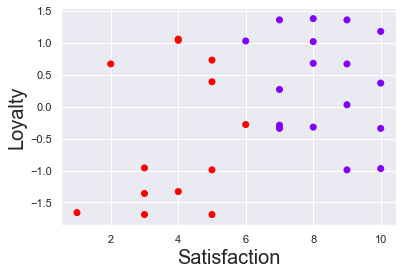

In [16]:
plt.scatter(data['Satisfaction'],data['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)
plt.show()

In [17]:
from sklearn import preprocessing

In [18]:
 x_scaled = preprocessing.scale(x)

In [21]:
wcss =[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.453683468776063,
 4.380320178840311,
 3.81931642320696]

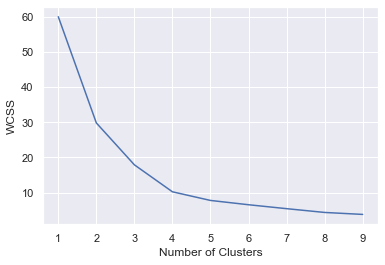

In [23]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['clusters_pred'] = kmeans_new.fit_predict(x_scaled)

In [27]:
cluster_new

,Satisfaction,Loyalty,clusters_pred
0,4,-1.33,4
1,6,-0.28,1
2,5,-0.99,4
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,4
6,10,-0.97,3
7,8,-0.32,1
8,8,1.02,2
9,8,0.68,2


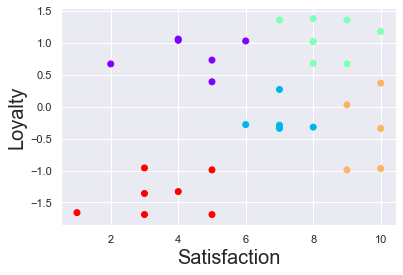

In [30]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['clusters_pred'],cmap='rainbow')
plt.xlabel('Satisfaction',fontsize=20)
plt.ylabel('Loyalty',fontsize=20)
plt.show()